## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read and show first few rows of the dataframe

df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Get the info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
#Get the shape of the dataframe
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
#Get the number of unique users in the dataframe

df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
#Proportion of users converted

df.converted.sum()/df.user_id.nunique()

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#Number of times the treatment does not match new_page
#add 2 cases (new_page, control) and (old_page, treatment)

df.query('landing_page == "new_page" and group == "control"').shape[0] + df.query('landing_page == "old_page" and group == "treatment"').shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None of the rows have missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#Create dataframe with treatment and new page matching
df_t = df.query('group == "treatment" and landing_page == "new_page"')

In [10]:
#Create dataframe with control and old page matching

df_c = df.query('group == "control" and landing_page == "old_page"')

In [11]:
#Concat 2 dataframes and reset the index of the resulting dataframe and drop index column

df2= pd.concat([df_t, df_c])
df2.reset_index(inplace = True)
df2.drop('index', axis = 1, inplace =True)
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
5,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
6,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
7,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
8,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
9,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#duplicated user_id

df2.user_id[df2.user_id.duplicated()]

1404    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop(df2.index[1404], inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#probability of converting regardless of page

df2.converted.sum()/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#probability of converting given the individual was in control

df2.query('group == "control"').converted.sum()/df2.query('group == "control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#probability of converting given the individual was in treatment

df2.query('group == "treatment"').converted.sum()/df2.query('group == "treatment"').shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
(df2.landing_page == "new_page").sum()/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

As per the conversion rate of both control and treatment group, it is difficult to conclude treatment is leading to conversion. In fact, the conversion rate for control group is slightly higher than the treatment one.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$$ H_0: p_{old, alpha=0.5} >= p_{new, alpha=0.5} $$

$$ H_A: p_{old, alpha=0.5} <  p_{new, alpha=0.5} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

Since p_new and p_old are equal under the null therefore, the conversion rate would be equal regardless of the landing page

In [21]:
p_new = df2.converted.sum()/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2.converted.sum()/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice(2, size=n_new, p=[p_new, 1-p_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice(2, size=n_old, p=[p_old, 1-p_old])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
diff= new_page_converted.mean()- old_page_converted.mean()
diff

-0.0009615995278817735

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice(2, size=n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice(2, size=n_old, p=[p_old, 1-p_old])
    p_diff = new_page_converted.mean()- old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

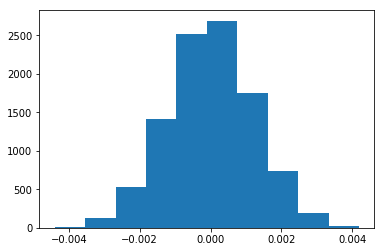

In [29]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
(p_diffs > diff).mean()

0.79120000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Point estimates of sample could sometimes lead to wrong conclusion about population. Therefore, it is necessary to simulate the estimates for large number of trials. The value calculated in part j is known as p-value. Large p-value, as in this case, supports the null hypothesis. So, we cannot reject the null which states that the old page is better than the new page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df_c['converted'].sum()
convert_new = df_t['converted'].sum()
n_old = df_c.shape[0]
n_new = df_t.shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = proportions_ztest(counts, nobs, alternative = 'smaller')
print(stat, pval)

1.31160753391 0.905173705141


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value in the earlier question leads to a conclusion that we fail to reject the null--the old page is better than the new page. The findings of parts j. and k. matches**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [34]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [35]:
df2['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
import statsmodels.api as sm

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-17 23:07 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.1899. The p-values for both differs because of different hypothesis being tested. In part II the difference in conversion rates of the 2 pages are tested whereas in the logistic regression, the significance of ab_page coefficient on predicting conversion is tested. Also, in part II one tail test is conducted whereas in regression 2 tail test is conducted therefore, we see such difference in p-values.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Including more predicting variables could result in more robust prediction model given the fact that the predictor could be correlated to several variables. Main disadvantage of including multiple variables is collinearity which could lead to misinterpretation of results**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
df2= df2.join(df_countries.set_index('user_id'), on = 'user_id');

In [40]:
df2[['CA','UK','US']] = pd.get_dummies(df_countries['country'])

In [41]:
#Check for NA's in the table
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 11 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
ab_page         290584 non-null uint8
intercept       290584 non-null int64
country         290584 non-null object
CA              290583 non-null float64
UK              290583 non-null float64
US              290583 non-null float64
dtypes: float64(3), int64(3), object(4), uint8(1)
memory usage: 24.7+ MB


In [42]:
df2.tail()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,0,1,US,0.0,1.0,0.0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,0,1,US,0.0,1.0,0.0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,0,1,US,1.0,0.0,0.0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,0,1,US,0.0,1.0,0.0
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,0,1,US,NaN,NaN,NaN


In [43]:
# Find the value
df2[['CA','UK','US']].isna()

,CA,UK,US
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [44]:
df2.tail(10)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
290575,834362,2017-01-17 01:51:56.106436,control,old_page,0,0,1,US,0.0,1.0,0.0
290576,923948,2017-01-09 16:33:41.104573,control,old_page,0,0,1,US,0.0,0.0,1.0
290577,857744,2017-01-05 08:00:56.024226,control,old_page,0,0,1,US,0.0,0.0,1.0
290578,755438,2017-01-18 17:35:06.149568,control,old_page,0,0,1,US,0.0,0.0,1.0
290579,908354,2017-01-11 02:42:21.195145,control,old_page,0,0,1,US,0.0,0.0,1.0
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,0,1,US,0.0,1.0,0.0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,0,1,US,0.0,1.0,0.0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,0,1,US,1.0,0.0,0.0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,0,1,US,0.0,1.0,0.0
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,0,1,US,NaN,NaN,NaN


In [45]:
#Drop row with NA value
df2.dropna(inplace= True)

In [46]:
df2[['CA','UK','US']] = pd.get_dummies(df_countries['country'])

In [47]:
df2.tail()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
290579,908354,2017-01-11 02:42:21.195145,control,old_page,0,0,1,US,0,0,1
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,0,1,US,0,1,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,0,1,US,0,1,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,0,1,US,1,0,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,0,1,US,0,1,0


In [48]:
df2['intercept'] = 1

log_mod2 = sm.Logit(df2['converted'], df2[['intercept','US','UK','ab_page']])
res2= log_mod2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-17 23:07 AIC:              212781.4572
No. Observations:   290583           BIC:              212823.7758
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0274    0.0266  -76.2828  0.0000  -2.0795  -1.9753
US             0.0388    0.0269    1.4443  0.1487  -0.0139   0.0914
UK             0.0459    0.0284    1.6169  0.1059  -0.0097   0.1015
ab_page       -0.0150    0.0114   -1.3147  0.1886  -0.0374   0.0074
==================================================================

"""

**The coefficients of the country US and UK are statistically insignificant since the p-values are high. Also, the ab_page coefficient is statistically insignificant. Only the intercept is statistically significant. However, it is true for any country set as baseline. Therefore, it would be valuable to look into the interaction b/w the page and country.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
#Create interaction column for each country

df2['US_ab_page'] = df2['US']*df2['ab_page']
df2['UK_ab_page'] = df2['UK']*df2['ab_page']
df2['CA_ab_page'] = df2['CA']*df2['ab_page']

In [62]:
#US model fit

log_mod_US = sm.Logit(df2['converted'], df2[['intercept','US_ab_page','ab_page']])
res_US= log_mod_US.fit()
res_US.summary2()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-17 23:20 AIC:              212782.0607
No. Observations:   290583           BIC:              212813.7997
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6679  0.0000  -2.0046  -1.9730
US_ab_page    0.0032    0.0177     0.1814  0.8561  -0.0315   0.0379
ab_page      -0.0173    0.0169    -1.0213  0.3071  -0.0504   0.0159
==================================================================

"""

In [63]:
#CA model fit

log_mod_CA = sm.Logit(df2['converted'], df2[['intercept','CA_ab_page','ab_page']])
res_CA= log_mod_CA.fit()
res_CA.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-17 23:21 AIC:              212776.5337
No. Observations:   290583           BIC:              212808.2727
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6679  0.0000  -2.0046  -1.9730
CA_ab_page   -0.0900    0.0386    -2.3331  0.0196  -0.1657  -0.0144
ab_page      -0.0107    0.0116    -0.9236  0.3557  -0.0334   0.0120
==================================================================

"""

In [64]:
#UK model fit

log_mod_UK = sm.Logit(df2['converted'], df2[['intercept','UK_ab_page','ab_page']])
res_UK= log_mod_UK.fit()
res_UK.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-17 23:23 AIC:              212781.1406
No. Observations:   290583           BIC:              212812.8796
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6679  0.0000  -2.0046  -1.9730
UK_ab_page    0.0183    0.0187     0.9774  0.3284  -0.0183   0.0549
ab_page      -0.0196    0.0124    -1.5829  0.1134  -0.0438   0.0047
==================================================================

"""

## Conclusion

### The above logistic model based on the interaction of the country with the page received we see that there is a significant relationship between prediction and the interaction for Canada. However, it is not the case with UK and US. We could say that the there is a difference in conversion rate particularly in Canada. This analysis helped us isolate the effects of country on conversion rate which was quite unlike the hypothesis carried out in part II of the analysis.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0